<a href="https://colab.research.google.com/github/ahmadabd1/ahmad/blob/main/Copy_of_Copy_of_Cat_Dog_Rabbit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import The liberaries

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.transform import resize
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten

- pet_photos/
  - cat/
    - cat1.jpg
    - cat2.jpg
    - ...
  - dog/
    - dog1.jpg
    - dog2.jpg
    - ...
  - rabbit/
    - rabbit1.jpg
    - rabbit2.jpg
    - ...

In [ ]:
!unzip pet_photos.zip

Archive:  pet_photos.zip
   creating: pet_photos/
   creating: pet_photos/cat/
   creating: pet_photos/dog/
   creating: pet_photos/rabbit/
  inflating: pet_photos/cat/cat60.jpg  
  inflating: pet_photos/cat/cat74.jpg  
  inflating: pet_photos/cat/cat48.jpg  
  inflating: pet_photos/cat/cat49.jpg  
  inflating: pet_photos/cat/cat75.jpg  
  inflating: pet_photos/cat/cat61.jpg  
  inflating: pet_photos/cat/cat88.jpg  
  inflating: pet_photos/cat/cat77.jpg  
  inflating: pet_photos/cat/cat63.jpg  
  inflating: pet_photos/cat/cat62.jpg  
  inflating: pet_photos/cat/cat76.jpg  
  inflating: pet_photos/cat/cat89.jpg  
  inflating: pet_photos/cat/cat99.jpg  
  inflating: pet_photos/cat/cat72.jpg  
  inflating: pet_photos/cat/cat66.jpg  
  inflating: pet_photos/cat/cat67.jpg  
  inflating: pet_photos/cat/cat73.jpg  
  inflating: pet_photos/cat/cat98.jpg  
  inflating: pet_photos/cat/cat59.jpg  
  inflating: pet_photos/cat/cat65.jpg  
  inflating: pet_photos/cat/cat71.jpg  
  inflating: pet_pho

In [ ]:
!find . -name "*.DS_Store" -type f -delete

In [ ]:
images_train = []
target_train = []

In [ ]:
photos_dir = "pet_photos"
listdir = os.listdir(photos_dir)

classlabelno = 0
for sub_dir in listdir:

  label = classlabelno
  sub_dir = os.path.join(photos_dir,sub_dir)
  list_sub_dir = os.listdir(sub_dir)
  
  for file in list_sub_dir:
    file_path = os.path.join(sub_dir,file)
    print (label)
    try:
      img = imread(file_path)
      dimension=(224, 224)
      img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
      images_train.append(img_resized)
      target_train.append(label)
    except:
      print("GOOD")
  classlabelno +=1

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [ ]:
target_train = np.array(target_train)
images_train = np.array(images_train)
print(target_train)
print(images_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
[[[[0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]
   ...
   [0.93323236 0.80382059 0.68225196]
   [0.93106899 0.80165723 0.6800886 ]
   [0.92941176 0.8        0.67843137]]

  [[0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]
   ...
   [0.93304103 0.80362926 0.6820

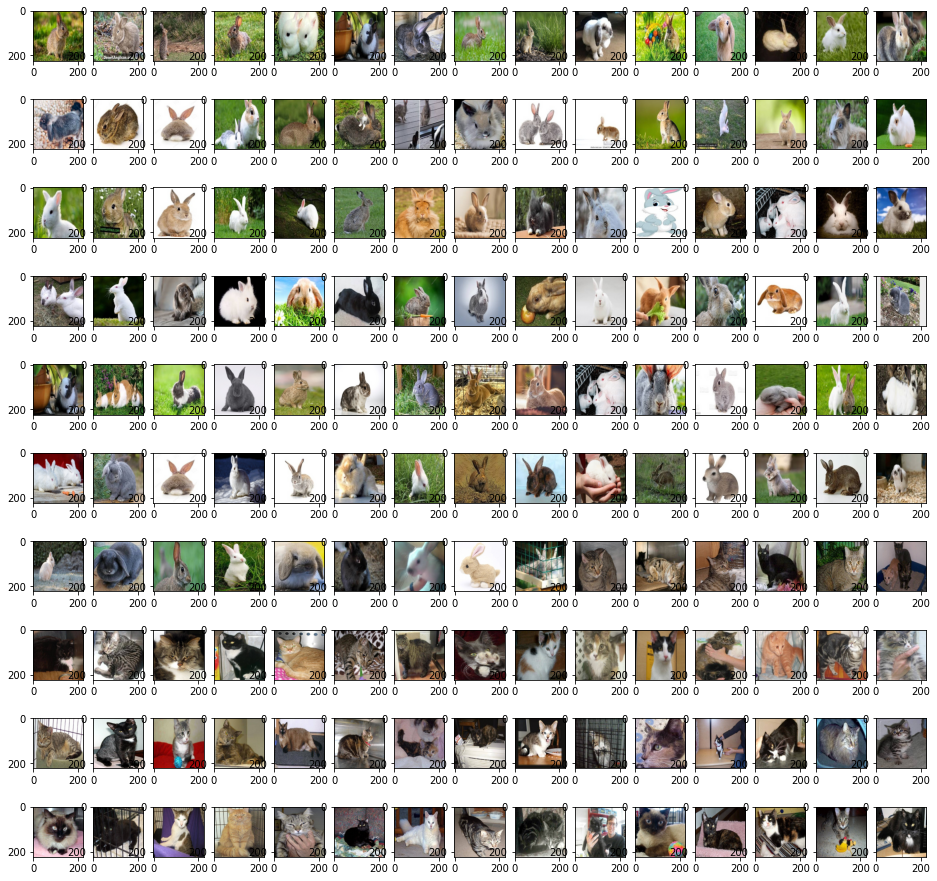

In [ ]:
fig=plt.figure(figsize=(16, 16))
for i in range(1, 10*15 +1):
    img = images_train[i]
    fig.add_subplot(10, 15, i)
    plt.imshow(img)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    images_train, target_train, test_size=0.3,random_state=109)

In [ ]:
print('Number of trainning set : ',X_train.shape[0])
print('Number of testing set : ',X_test.shape[0])

Number of trainning set :  210
Number of testing set :  90


In [ ]:
print('Data shape : ',X_train.shape)

Data shape :  (210, 224, 224, 3)


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(224,224,3)))
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 128)     36992     
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 128)    512       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 128)     147584    
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 128)    512       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 128)    0

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

In [ ]:
checkpoint = ModelCheckpoint('model.h5', monitor='val_accuracy', 
                            verbose=1, save_best_only=True, mode='max')

In [ ]:
history = model.fit(
        X_train,y_train,
        validation_data=(X_test,y_test),
        epochs=50, 
        callbacks=[checkpoint]
)

Epoch 1/50


<ipython-input-16-31c59741b0fc>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', label='Training accuracy',color='r')
<ipython-input-16-31c59741b0fc>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss' ,color='r')


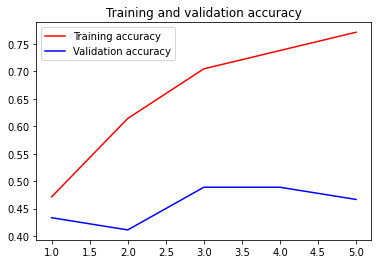

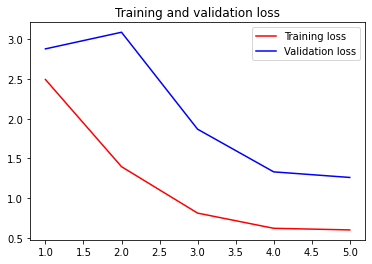

In [ ]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accuracy',color='r')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss' ,color='r')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

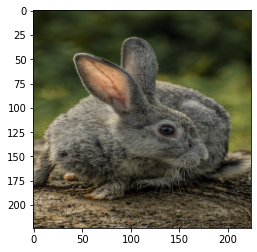

1/1 [==============================] - 1s 1s/step
Rabbit


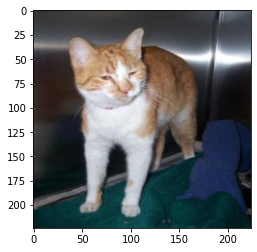

1/1 [==============================] - 1s 680ms/step
Cat


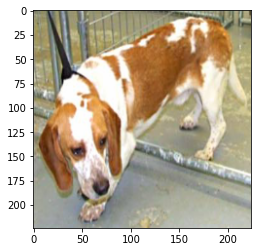

1/1 [==============================] - 1s 801ms/step
Rabbit


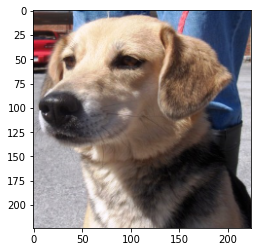

1/1 [==============================] - 0s 496ms/step
Rabbit


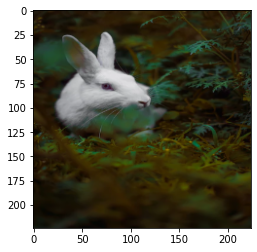

1/1 [==============================] - 1s 506ms/step
Cat


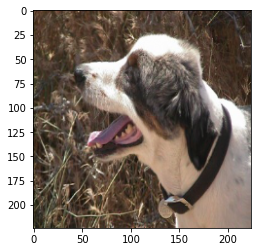

1/1 [==============================] - 0s 469ms/step
Rabbit


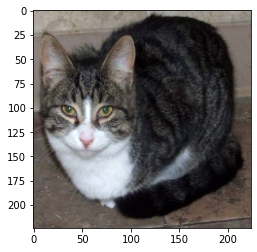

1/1 [==============================] - 1s 501ms/step
Dog


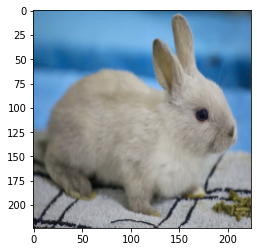

1/1 [==============================] - 0s 483ms/step
Rabbit


In [ ]:
import numpy as np
import os
from os import listdir
 
# get the path/directory
folder_dir = "/content/test"
model = load_model('model.h5')
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".jpg")):
# read images
      img = imread(folder_dir+'/'+images)

# define new shape of image
    dimension=(224, 224)
# resize the image
    img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')

    img_resized = np.expand_dims(img_resized, axis=0)

#plot image
    plt.imshow(img_resized[0])
    pic = plt.show()

# predict the class
    classes = np.argmax(model.predict(img_resized))
    if classes==2:
      print("Cat")
    elif classes==0:
      print("Rabbit")
    else:
      print("Dog")


In [ ]:
import numpy as np
import os
from os import listdir
 
# get the path/directory
folder_dir = "/content/test"
model = load_model('model.h5')
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".jpg")):
# read images
      img = imread(folder_dir+'/'+images)

# define new shape of image
    dimension=(224, 224)
# resize the image
    img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')

    img_resized = np.expand_dims(img_resized, axis=0)

#plot image
    plt.imshow(img_resized[0])
    pic = plt.show()

# predict the class
    classes = np.argmax(model.predict(img_resized))
    if classes==0:
      print("Cat")
    elif classes==1:
      print("Rabbit")
    else:
      print("Dog")

OSError: ignored

In [ ]:
import numpy as np

path='test/rabbit.jpg';
model = load_model('model.h5')
img = imread(path)
dimension=(224, 224)
img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
img_resized = np.expand_dims(img_resized, axis=0)
plt.imshow(img_resized[0])
pic = plt.show()
classes = np.argmax(model.predict(img_resized))
if classes==0:
  print("Cat")
elif classes==1:
  print("Rabbit")
else:
  print("Dog")

ResourceExhaustedError: ignored